In [2]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import os
from matplotlib.patches import Rectangle
import glob
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append('/home/rfinn/github/Virgo/programs/')
import virgoCommon

Running on Rose's computer


In [4]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v2/'

In [5]:
plotdir = '/home/rfinn/research/Virgo/plots/'

In [6]:
%run ~/github/Virgo/programs/readtablesv2.py

In [7]:
v.co.colnames

['VFID',
 'RAgas',
 'DECgas',
 'COreference',
 'alphaCO',
 'Mmol',
 'Mmol_err_up',
 'Mmol_err_down',
 'r21',
 'err_r21',
 'tdep',
 'tdep_err_up',
 'tdep_err_down',
 'HIreference',
 'MHI',
 'MHI_err_up',
 'MHI_err_down',
 'MH2_to_MHI',
 'MH2_to_MHI_err_up',
 'MH2_to_MHI_err_down',
 'H2def',
 'errH2def',
 'HIdef',
 'errHIdef',
 'Separation']

In [8]:
v.co

VFID,RAgas,DECgas,COreference,alphaCO,Mmol,Mmol_err_up,Mmol_err_down,r21,err_r21,tdep,tdep_err_up,tdep_err_down,HIreference,MHI,MHI_err_up,MHI_err_down,MH2_to_MHI,MH2_to_MHI_err_up,MH2_to_MHI_err_down,H2def,errH2def,HIdef,errHIdef,Separation
,,,,,,,,,,,,,,,,,,,,,,,,arcsec
bytes8,float64,float64,bytes20,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes20,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
VFID0000,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
VFID0001,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
VFID0002,145.9446417,74.8595806,AMIGA,--,2137962089.5022326,267245261.18777907,267245261.18777907,--,--,977237220.9558109,466318233.2383137,466318233.2383137,AMIGA,1785388119.6763194,568211800.0255375,431032729.3663405,1.1974774929553316,-1.0,-1.0,-0.1671978403536123,0.05428681023790647,0.4044138839760478,0.13821714538357247,0.0
VFID0003,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
VFID0004,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
VFID0005,173.1341542,74.6275556,AMIGA,--,194984459.97580415,62898212.89542069,62898212.89542069,--,--,691830970.9189352,388987583.2481682,388987583.2481682,AMIGA,761610004.9656029,242387516.23228005,183869734.28083017,0.2560161482970676,-1.0,-1.0,0.3949021596463904,0.14009499416233928,0.20576030701728598,0.1382171453835725,0.0
VFID0006,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
VFID0007,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--


In [9]:
coflag = v.co['RAgas'] > 0. 

In [10]:
coflag = ~coflag.mask

In [11]:
coflag[0:5]

array([False, False,  True, False, False])

In [12]:
m1 = SkyCoord('15 06 19.92 +01 51 00.00',unit=(u.hourangle,u.deg))
m2 = SkyCoord('15 00 48.00 +01 57 00.00',unit=(u.hourangle,u.deg))
m3 = SkyCoord('14 20 38.64 +03 36 36.00',unit=(u.hourangle,u.deg))
m4 = SkyCoord('13 55 47.52 +05 12 00.00',unit=(u.hourangle,u.deg))
m5 = SkyCoord('13:37:31.920 +08:53:06.00',unit=(u.hourangle,u.deg))
m6 = SkyCoord('14:06:31.680 +06:01:44.40',unit=(u.hourangle,u.deg))
m7 = SkyCoord('14:23:26.880 +01:43:33.60',unit=(u.hourangle,u.deg))
m8 = SkyCoord('14:33:24.240 +04:27:00.00',unit=(u.hourangle,u.deg))
m9 = SkyCoord('14:44:55.919 +01:57:17.64',unit=(u.hourangle,u.deg))
m10 = SkyCoord('14:53:05.249 +03:19:54.12',unit=(u.hourangle,u.deg))
m11 = SkyCoord('15:02:03.509 +01:50:28.32',unit=(u.hourangle,u.deg))

 
meerkat = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11]
# from Pascale's email on 3/27
field1 = SkyCoord('208.8 5.2',unit=(u.deg,u.deg),frame='icrs')
field2 = SkyCoord('215.16 3.6',unit=(u.deg,u.deg),frame='icrs')
field3b = SkyCoord('225.23 1.87',unit=(u.deg,u.deg),frame='icrs')
field4 = SkyCoord('226.6 1.85',unit=(u.deg,u.deg),frame='icrs')
ra = v.main['RA'][v.main['VFID'] == 'VFID6147']+.1
dec =  v.main['DEC'][v.main['VFID'] == 'VFID6147']+.15

altfield = SkyCoord(ra,dec,unit=(u.deg,u.deg),frame='icrs')
print(field1)
print(altfield[0])
meerkat = [field1,field2,field3b,field4,altfield[0]]
titles = ['Field_1','Field_2','Field_3b','Field_4']
meerkat = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11]

titles.append('Field_alt')
print(ra)
print(dec)

<SkyCoord (ICRS): (ra, dec) in deg
    (208.8, 5.2)>
<SkyCoord (ICRS): (ra, dec) in deg
    (191.3747005, 3.2055045)>
     RA    
-----------
191.3747005
   DEC   
---------
3.2055045


In [13]:
# pointings from Mpati
#Observed:
m1 = SkyCoord('226.583 1.85',unit=(u.deg,u.deg))
m2 = SkyCoord('215.161 3.61',unit=(u.deg,u.deg))
m3 = SkyCoord('208.948 5.20',unit=(u.deg,u.deg))
m4 = SkyCoord('217.60 3.37',unit=(u.deg,u.deg))

observed = [m1,m2,m3,m4]
#to be observed
m5 = SkyCoord('204.383416 8.8851',unit=(u.deg,u.deg))
m6 = SkyCoord('211.632958 6.0297',unit=(u.deg,u.deg))
m7 = SkyCoord('215.862999 1.7263',unit=(u.deg,u.deg))
m8 = SkyCoord('218.351416 4.4504',unit=(u.deg,u.deg))
m9 = SkyCoord('221.232999 1.9549',unit=(u.deg,u.deg))
m10 = SkyCoord('223.271874 3.3317',unit=(u.deg,u.deg))
m11 = SkyCoord('225.514624 1.8412',unit=(u.deg,u.deg))

tobe = [m5,m6,m7,m8,m9,m10,m11]
meerkat = observed + tobe

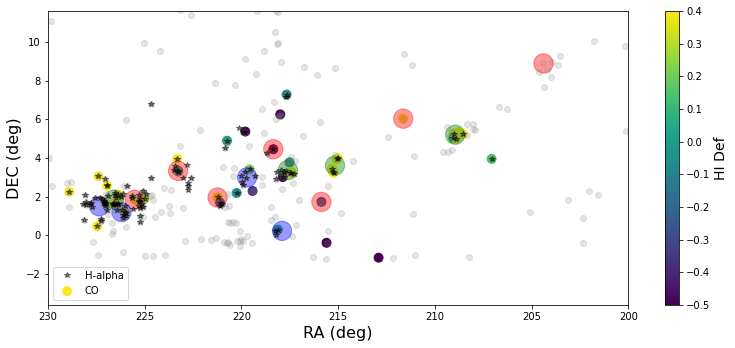

In [87]:
plt.figure(figsize=(13,6))
plt.subplots_adjust(bottom=.2)
ax = plt.gca()

m10 = SkyCoord('223.271874 3.3317',unit=(u.deg,u.deg))
m11 = SkyCoord('225.514624 1.8412',unit=(u.deg,u.deg))
n1 = SkyCoord('227.35 1.5',unit=(u.deg,u.deg))
n2 = SkyCoord('226.2 1.2',unit=(u.deg,u.deg))
n3 = SkyCoord('219.7 3',unit=(u.deg,u.deg))
n5 = SkyCoord('217.9 0.23',unit=(u.deg,u.deg))
#n4 = SkyCoord('222.8 2.7',unit=(u.deg,u.deg))

#n6 = SkyCoord('220.7 4.8',unit=(u.deg,u.deg))
allfields = meerkat + [n1,n2,n3,n5]
for i,m in enumerate(allfields):
    if i < 4:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='g',alpha=.4,label='Observed' )
    elif i < 11:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='r',alpha=.4,label='In queue' )
    else:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='b',alpha=.4,label='This Proposal' )
    ax.add_artist(circ)
    
filname = ''    
HIdef_flag = v.a100['HIdef_bos'] > 0.5
HIdef_flag = v.a100['HIdef_bytype'] > 0.5
flag = (v.env['filament'] == 'VirgoIII') & (v.env['filament_member'])
flag =  np.ones(len(v.env),'bool')

flag = v.magphys['logMstar'] >=7.5
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='.5',alpha=.2)

flag = v.main['HAobsflag'] & (v.env['filament'] == 'VirgoIII') & (v.env['filament_member']) 
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'k*',alpha=.5,label='H-alpha')


flag = coflag & (v.env['filament'] == 'VirgoIII')   #& (v.env['filament_member'])
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=v.co['HIdef'][flag],s=80,vmin=-.5,vmax=.4,label='CO')
cb = plt.colorbar(label="HI Def")
cb.set_label(label="HI Def",size=14)
# plot VFIDs of galaxies
ra = v.main['RA'][flag]
dec = v.main['DEC'][flag]
name = v.main['VFID'][flag]
namev1 = v.main['VFID_V1'][flag]
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
for i in range(len(ra)):
    #print(i,name[i],ra[i],dec[i])
    #plt.text(ra[i],dec[i]+.1,str(name[i]))
    #plt.text(ra[i]-3,dec[i]+.1,str(namev1[i]))
    pass


# mark objects with interesting Halpha

plt.axis('equal')
plt.axis([200,230,-2,10])
plt.gca().invert_xaxis()
plt.legend()


In [92]:
print(n5.ra.hms)
print(n5.dec.dms)

hms_tuple(h=14.0, m=31.0, s=36.00000000000861)
dms_tuple(d=0.0, m=13.0, s=48.00000000000004)


# Fraction of filament galaxies that will be observed



In [53]:

#n1 = SkyCoord('227.8 1.8',unit=(u.deg,u.deg))
n1 = SkyCoord('227.35 1.5',unit=(u.deg,u.deg))
n2 = SkyCoord('226.2 1.2',unit=(u.deg,u.deg))
n3 = SkyCoord('219.7 3',unit=(u.deg,u.deg))
n4 = SkyCoord('222.8 2.7',unit=(u.deg,u.deg))
n5 = SkyCoord('217.9 0.23',unit=(u.deg,u.deg))
# find galaxies within 0.5 deg of each center
allfields = meerkat + [n1,n2,n3,n4,n5]
cat = SkyCoord(v.main['RA'],v.main['DEC'],unit=(u.deg,u.deg))
allflag = np.zeros(len(v.main),'bool')
for n in allfields:
    sep = cat.separation(n)
    flag = sep < 0.5*u.deg
    print(sum(flag))
    allflag[flag] = np.ones(np.sum(flag),'bool')

baseflag = v.magphys['logMstar'] > 8.5

nobs = np.sum(allflag &  (v.env['filament'] == 'VirgoIII') & (v.env['filament_member']) & baseflag )
nfilament_members = np.sum( (v.env['filament'] == 'VirgoIII') & v.env['filament_member'] & baseflag )
print(f'number of galaxies in meerkat pointings = {np.sum(allflag)}')

print(f"number of filament members that are observed = {nobs}/{nfilament_members} = {nobs/nfilament_members:.2f}")

22
6
11
11
3
1
2
2
4
6
13
13
14
7
5
3
number of galaxies in meerkat pointings = 117
number of filament members that are observed = 25/66 = 0.38


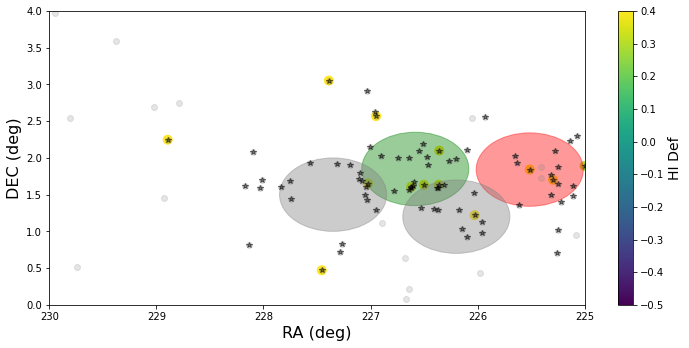

In [15]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(bottom=.2)
ax = plt.gca()

m10 = SkyCoord('227.35 1.5',unit=(u.deg,u.deg))
m11 = SkyCoord('226.2 1.2',unit=(u.deg,u.deg))

ameerkat = meerkat + [m10,m11]
for i,m in enumerate(ameerkat):
    if i < 4:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='g',alpha=.4,label='Meerkat' )
    elif i < 11:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='r',alpha=.4,label='Meerkat' )
    else:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='0.5',alpha=.4,label='Meerkat' )
    ax.add_artist(circ)
    
filname = ''    
HIdef_flag = v.a100['HIdef_bos'] > 0.5
HIdef_flag = v.a100['HIdef_bytype'] > 0.5
flag = (v.env['filament'] == 'VirgoIII') #& (v.env['filament_member'])
flag =  np.ones(len(v.env),'bool')
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='.5',alpha=.2)

flag = v.main['HAobsflag'] #& (v.env['filament'] == 'VirgoIII') & (v.env['filament_member']) 
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'k*',alpha=.5)


flag = coflag #& (v.env['filament'] == 'VirgoIII')   #& (v.env['filament_member'])
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=v.co['HIdef'][flag],s=80,vmin=-.5,vmax=.4)
cb = plt.colorbar(label="HI Def")
cb.set_label(label="HI Def",size=14)
# plot VFIDs of galaxies
ra = v.main['RA'][flag]
dec = v.main['DEC'][flag]
name = v.main['VFID'][flag]
namev1 = v.main['VFID_V1'][flag]
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
for i in range(len(ra)):
    #print(i,name[i],ra[i],dec[i])
    #plt.text(ra[i],dec[i]+.1,str(name[i]))
    #plt.text(ra[i]-3,dec[i]+.1,str(namev1[i]))
    pass

#A100 sources, HI def
#flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag']) & HIdef_flag
#plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ks',color='orange',mec='k',alpha=.6,markersize=9,label=r'$HI \ def$')
#A100 sources, HI normal
#flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag']) & ~HIdef_flag
#plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ks',color='c',alpha=.5,markersize=9,label=r'$HI \ normal$')
# Halpha sources
#flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['HAobsflag'])
#plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='b',alpha=.4,markersize=5,label=r'$observed \  in \ H\alpha$')

# CO sources
#flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['COflag'])
#plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='r',alpha=1,markersize=2,label=r'$CO$')


# mark objects with interesting Halpha
plt.axis([225,230,0,4])
plt.gca().invert_xaxis()


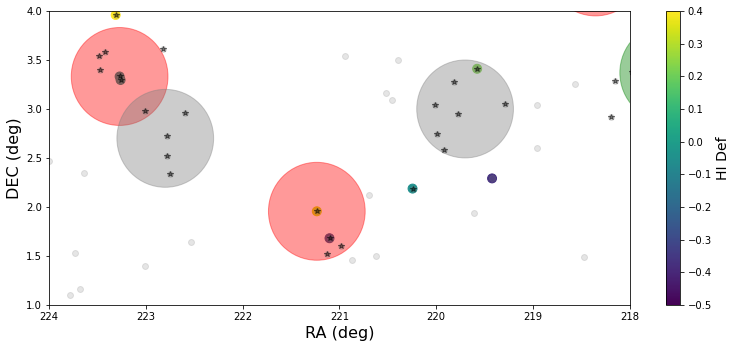

In [16]:
plt.figure(figsize=(13,6))
plt.subplots_adjust(bottom=.2)
ax = plt.gca()

m10 = SkyCoord('219.7 3',unit=(u.deg,u.deg))
m11 = SkyCoord('222.8 2.7',unit=(u.deg,u.deg))

ameerkat = meerkat + [m10,m11]
for i,m in enumerate(ameerkat):
    if i < 4:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='g',alpha=.4,label='Meerkat' )
    elif i < 11:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='r',alpha=.4,label='Meerkat' )
    else:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='0.5',alpha=.4,label='Meerkat' )
    ax.add_artist(circ)
    
filname = ''    
HIdef_flag = v.a100['HIdef_bos'] > 0.5
HIdef_flag = v.a100['HIdef_bytype'] > 0.5
flag = (v.env['filament'] == 'VirgoIII') #& (v.env['filament_member'])
flag =  np.ones(len(v.env),'bool')
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='.5',alpha=.2)

flag = v.main['HAobsflag'] #& (v.env['filament'] == 'VirgoIII') & (v.env['filament_member']) 
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'k*',alpha=.5)


flag = coflag #& (v.env['filament'] == 'VirgoIII')   #& (v.env['filament_member'])
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=v.co['HIdef'][flag],s=80,vmin=-.5,vmax=.4)
cb = plt.colorbar(label="HI Def")
cb.set_label(label="HI Def",size=14)
# plot VFIDs of galaxies
ra = v.main['RA'][flag]
dec = v.main['DEC'][flag]
name = v.main['VFID'][flag]
namev1 = v.main['VFID_V1'][flag]
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
for i in range(len(ra)):
    #print(i,name[i],ra[i],dec[i])
    #plt.text(ra[i],dec[i]+.1,str(name[i]))
    #plt.text(ra[i]-3,dec[i]+.1,str(namev1[i]))
    pass


# mark objects with interesting Halpha
plt.axis([218,224,1,4])
plt.gca().invert_xaxis()


In [75]:
# new pointings

#n1 = SkyCoord('227.8 1.8',unit=(u.deg,u.deg))
n1 = SkyCoord('227.35 1.5',unit=(u.deg,u.deg))
n2 = SkyCoord('226.2 1.2',unit=(u.deg,u.deg))
n3 = SkyCoord('219.7 3',unit=(u.deg,u.deg))
n4 = SkyCoord('222.8 2.7',unit=(u.deg,u.deg))
n5 = SkyCoord('217.9 0.23',unit=(u.deg,u.deg))
# find galaxies within 0.5 deg of each center

allnew = [n1,n2,n3,n4,n5]
cat = SkyCoord(v.main['RA'],v.main['DEC'],unit=(u.deg,u.deg))
allflag = np.zeros(len(v.main),'bool')
for n in allnew:
    sep = cat.separation(n)
    flag = sep < 0.5*u.deg
    print(sum(flag))
    allflag[flag] = np.ones(np.sum(flag),'bool')

# make a new tablecnames = ['name','RA','DEC','filament_member','filament']
cnames = ['name','NEDname','RA','DEC','logMstar','filament_member','filament']
newtab = Table([v.main['VFID'],v.main['NEDname'],v.main['RA'],v.main['DEC'],v.magphys['logMstar'],v.env['filament_member'],v.env['filament']],names=cnames)
newtab = newtab[allflag]

newtab.write('/home/rfinn/research/Virgo/meerkat3.fits',format='fits',overwrite=True)
    


                                
                                



13
14
7
5
3


In [76]:
test = Table.read('/home/rfinn/research/Virgo/meerkat3.fits')
    


In [77]:
test

name,NEDname,RA,DEC,logMstar,filament_member,filament
bytes8,bytes30,float64,float64,float64,bool,bytes40
VFID6098,NGC 5692,219.575478,3.4103085,9.068556895072364,True,VirgoIII
VFID6119,WISEA J143915.36+031621.3,219.814476,3.2726247,7.796088428680669,True,VirgoIII
VFID6149,SHOC 474,219.2870535,3.0471297,7.830909299546444,True,VirgoIII
VFID6150,SDSS J144002.87+030228.2,220.011975,3.0411296,7.482587769526767,True,VirgoIII
VFID6163,WISEA J145202.00+025842.9,223.008105,2.9782505,6.258637282724076,True,VirgoIII
VFID6169,SDSS J145022.84+025730.5,222.595368,2.9583558,8.376941757146758,True,VirgoIII
VFID6170,UGC 09432,219.7685925,2.9495585,8.012837224705173,True,VirgoIII
VFID6194,SDSS J143958.22+024451.9,219.992739,2.747919,7.857453117035266,True,VirgoIII
VFID6197,SDSSCGB 38563,222.78105449999998,2.7244022,7.0322157032979815,True,VirgoIII


Text(0, 0.5, 'DEC (deg)')

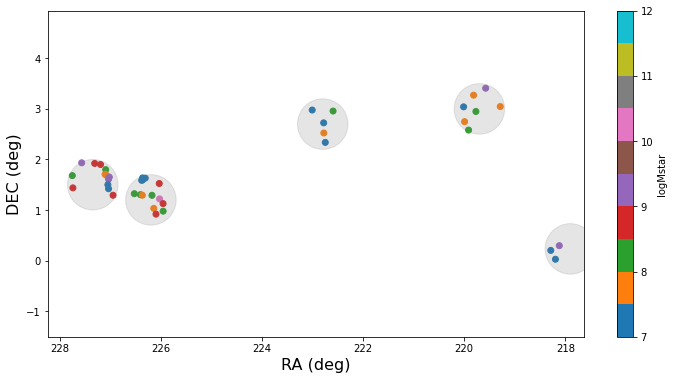

In [78]:
#n1 = SkyCoord('227.8 1.8',unit=(u.deg,u.deg))
n1 = SkyCoord('227.35 1.5',unit=(u.deg,u.deg))
n2 = SkyCoord('226.2 1.2',unit=(u.deg,u.deg))
n3 = SkyCoord('219.7 3',unit=(u.deg,u.deg))
n4 = SkyCoord('222.8 2.7',unit=(u.deg,u.deg))
n5 = SkyCoord('217.9 0.23',unit=(u.deg,u.deg))
# find galaxies within 0.5 deg of each center

allnew = [n1,n2,n3,n4,n5]

plt.figure(figsize=(12,6))
plt.scatter(test['RA'],test['DEC'],c=test['logMstar'],vmin=7,vmax=12,cmap='tab10')
ax = plt.gca()
for i,m in enumerate(allnew):

    circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='0.5',alpha=.2,label='Meerkat' )
    ax.add_artist(circ)
plt.axis('equal') 
plt.gca().invert_xaxis()
plt.colorbar(label='logMstar')
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)

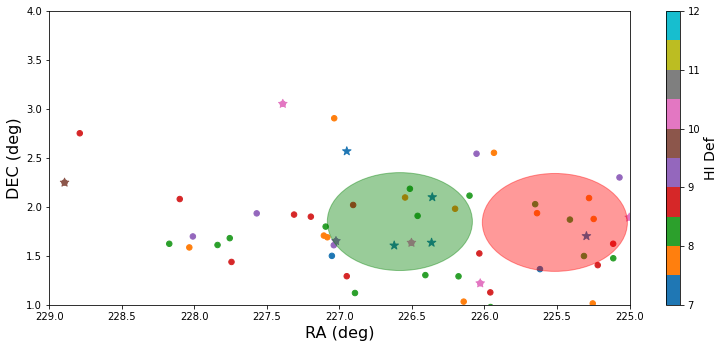

In [21]:
# checking mass limit for the full filament
# are we really complete above logMstar > 9

plt.figure(figsize=(13,6))
plt.subplots_adjust(bottom=.2)
ax = plt.gca()

m10 = SkyCoord('223.271874 3.3317',unit=(u.deg,u.deg))
m11 = SkyCoord('225.514624 1.8412',unit=(u.deg,u.deg))
for i,m in enumerate(meerkat):
    if i < 4:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='g',alpha=.4,label='Meerkat' )
    else:
        circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='r',alpha=.4,label='Meerkat' )
    ax.add_artist(circ)
    
filname = ''    
HIdef_flag = v.a100['HIdef_bos'] > 0.5
HIdef_flag = v.a100['HIdef_bytype'] > 0.5
flag = (v.env['filament'] == 'VirgoIII') #& (v.env['filament_member'])
flag =  np.ones(len(v.env),'bool')
flag = (v.magphys['logMstar'] >= 7) & (v.env['filament'] == 'VirgoIII') & (v.env['filament_member'])
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=v.magphys['logMstar'][flag],cmap='tab10',vmin=7,vmax=12,s=30)

#flag = v.main['HAobsflag'] #& (v.env['filament'] == 'VirgoIII') & (v.env['filament_member']) 
#plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'k*',alpha=.5)


flag = coflag & (v.env['filament'] == 'VirgoIII') & (v.env['filament_member'])
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=v.magphys['logMstar'][flag],marker='*',s=80,vmin=7,vmax=12,cmap='tab10')
cb = plt.colorbar(label="HI Def")
cb.set_label(label="HI Def",size=14)
# plot VFIDs of galaxies
ra = v.main['RA'][flag]
dec = v.main['DEC'][flag]
name = v.main['VFID'][flag]
namev1 = v.main['VFID_V1'][flag]
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
for i in range(len(ra)):
    #print(i,name[i],ra[i],dec[i])
    #plt.text(ra[i],dec[i]+.1,str(name[i]))
    #plt.text(ra[i]-3,dec[i]+.1,str(namev1[i]))
    pass


# mark objects with interesting Halpha
plt.axis([200,232,-3,12])
plt.axis([225,229,1,4])
plt.gca().invert_xaxis()


In [22]:
len(test)

39